## Hypothesis 
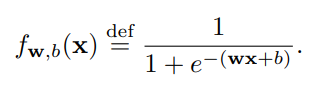

In [13]:
def h(x, w, b):
    """
    Hypothesis function
    x: Input variable
    w: Weight
    b: Bias
    """
    e = 2.718281828459045235360
    return 1/(1 + e ** -(w * x + b))

## Maximum Likelihood
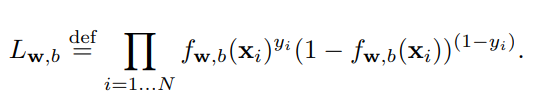

In [18]:
from itertools import product

def maximum_likelihood(X, Y, h, w, b):
    """
    X: List of observations {x0, x1, .., xn}
    Y: List of labels {y0, y1, .., yn}
    h: Hypothesis function
    w: Weight given to the hypothesis
    b: Bias given to the hypothesis
    """
    output = 1
    for x, y in zip(X, Y):
        if y: 
            output *= h(x, w, b)
        else:
            output *= 1 - h(x, w, b)
    return output

def maximum_likelihood_alternative(X, Y, h, w, b):
    return product(h(x, w, b) ** y * (1-h(x, w, b)) ** (1-y) for x, y in zip(X, Y))

## Log-Likelihood
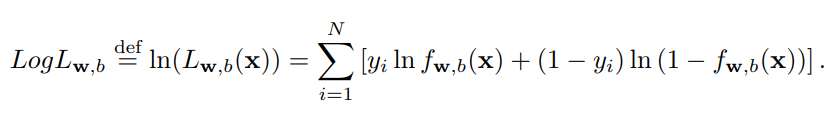

In [20]:
from numpy import log # log here is base e, and log10 is base 10

def log_likelihood(X, Y, h, w, b):
    """
    X: List of observations {x0, x1, .., xn}
    Y: List of labels {y0, y1, .., yn}
    h: Hypothesis function
    w: Weight given to the hypothesis
    b: Bias given to the hypothesis
    """
    output = 0
    for x, y in zip(X, Y):
        if y: 
            output += log(h(x, w, b))
        else:
            output += log(1 - h(x, w, b))
    return output

def log_likelihood_alternative(X, Y, h, w, b):
    return sum(y * log(h(x, w, b)) + (1-y) * log(1-h(x, w, b)) for x, y in zip(X, Y))

In [2]:
from random import random

import numpy as np
import matplotlib.pyplot as plt

class LogisticRegressor:
    def __init__(self, h, w, b):
        pass
    
    def predict(self, X) -> np.ndarray: 
        X = self.formatX(X)
        return  1/(1 + np.exp(- self.weights.T @ X.T))
    
    def fit(self, X, Y, degree=1, plot=False) -> None:
        """
        X: shape is (m, n)

        Y: shape is (m, 1)
        
        where 
            m is the number of data points
            n is the number of features   
        
        """
    
        # Init variables
        weight = random()
        bias = random()
        step = .001 ###
        numIteration = 50000 ###
        history = [] ###
        
        
        h = lambda x: 1/(1 + np.exp(- weights.T @ x))
#         cost = lambda: ( -Y * np.log(h(X.T)) - (1-Y) * np.log(1 - h(X.T)) ).mean()
        def cost():
            mean = 0
            for x, y in zip(X, Y):
                # x -> [x0, x1, x2, x3, ..] (1, n)
                # y -> 0 or 1
                if y == 1:
                    mean += -np.log(h(x))
                elif y == 0:
                    mean += -np.log(1 - h(x))
                else:
                    raise ValueError(f"Encountered a 'y' sample with value other than 0 or 1\ny:\t{y}")
            return (mean / m)[0]
        
        # Gradient Descent
        for _ in range(numIteration):
            for x, y in zip(X, Y):
                x = x.reshape(n, 1)
                weights = weights - step * 1/m * (h(x) - y) * x
            history.append(cost())
        
        print(f"Loss:\t{cost()}\nHistory:\t{history[::100]}\nWeights:\n{weights}")
        if plot:
            if n == 1 + 1:
                style.use('seaborn-pastel') #sets the size of the charts
                fig, ax = plt.subplots(2, figsize=(18, 16), dpi=80)
                ax[0].plot(history)
                ax[1].axhline(0.5, label=f"Threshold MSE: {cost()}", color='red')

                # Model (refactor later)
                temp = np.array(range(int(min(X[:, 1])), int(max(X[:, 1]))))
                indices = self.formatX(temp.reshape(temp.shape[0], 1)).reshape(temp.shape[0], n)
                ax[1].plot(indices[:, 1], h(indices.T).T, label="Logistic Regression Model", color='black')

                # Sample
                sample = X[:, 1].reshape(m, 1)
                ax[1].scatter(sample[Y == 1], Y[Y == 1], label="Class 1", color='green', marker='o')
                ax[1].scatter(sample[Y == 0], Y[Y == 0], label="Class 0", color='blue', marker='x')

                ax[1].legend()
                plt.show()
                
            elif n == 2 + 1:
                
#               # Refactor later
                ax = plt.axes(projection='3d')
                
                temp = np.array(range(int(np.min(X)), int(np.max(X))))
                indices  = self.formatX(temp.reshape(temp.shape[0], 1)).reshape(temp.shape[0], n-1)
                indices  = np.insert(indices, 2, temp, axis=1)
                ax.scatter3D(indices[:, 1], indices[:, 2], h(indices.T).T, label="Logistic Regression Model", color='black')
                
                sample = X[:, 1:].reshape(m, 2)
                ax.scatter3D(sample[:, 0][Y == 1], sample[:, 1][Y == 1], Y[Y == 1], label="Class 1", color='green', marker='o')
                ax.scatter3D(sample[:, 0][Y == 0], sample[:, 1][Y == 0], Y[Y == 0], label="Class 0", color='blue', marker='x')
                plt.show()
            else:
                print("Skipping plotting")
            
        self.degree = degree
        self.weights = weights
        return weights
    
    
    def formatX(self, X, degree=1):
        X = np.insert(X, 0, 1, axis=1) # Insert ones column (X₀)
        for i in range(degree-1):
            X = np.insert(X, X.shape[1], X[:, 1] ** (i+2), axis=1)
        return X